# Exploring Exoplanets using multiple Machine Learning methods



## Start with loading basic packages

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv("../exoTrain.csv")
df_const = df.copy()
df.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


There are 5087 observations(rows) and 3198 features(columns).

In [2]:
# Extract feature names Flux 1-3197 into an array
x = df.iloc[:, 1:]
features = x.columns.values
print(features)

['FLUX.1' 'FLUX.2' 'FLUX.3' ... 'FLUX.3195' 'FLUX.3196' 'FLUX.3197']


In [3]:
# Extract Flux 1-3197 values into an array
flux = x.values
# Extract Label feature into an array
label = df.loc[:,['LABEL']].values

print(flux.shape)
print(label.shape)

(5087, 3197)
(5087, 1)


Well, the time variable does not show clearly enough about what 0-3196 represents.
Let us change this a bit.
In this mission, NASA mentioned that the data was collected for approximately 
80 days. So, let us change the time unit in hours.
To get time between two fluxs interval, we calculate as follows:

(80 days * 24 hours * 60 minutes * 60 seconds) / 3197 fluxes.

So, each flux is separated by approximately 36 minutes or 2162 seconds.


In [4]:
time = np.arange(len(features)) * (36.0/60.0)
print(time)
print(time.shape)

[0.0000e+00 6.0000e-01 1.2000e+00 ... 1.9164e+03 1.9170e+03 1.9176e+03]
(3197,)


## Visualing Raw Data of Confirmed Exoplanets and Non-Exoplanets
#### Graph of everal confirmed Exoplanets
Note: Obs=1 means the first observation, Obs=6 means the sixth observation and so on

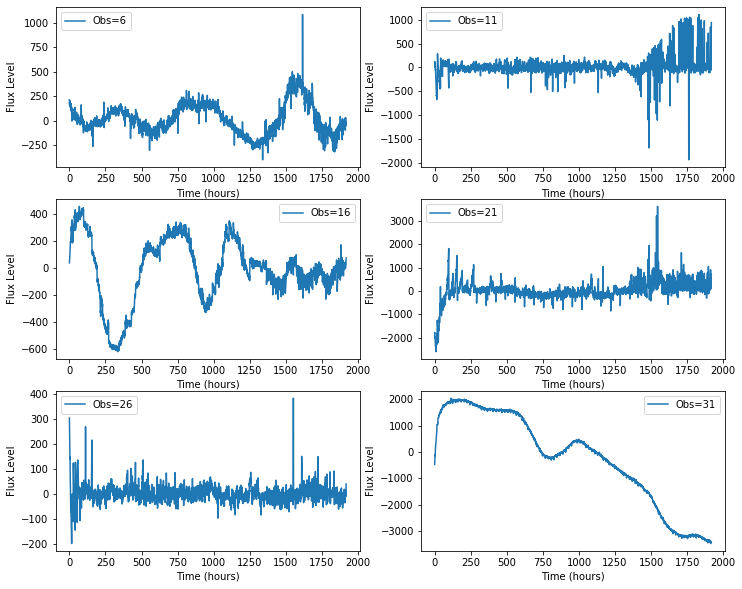

In [5]:
# Display 6 confirmed exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*5
    ax.plot(time, flux[step,:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Flux Level')
    ax.legend([('Obs=' + str(step+1))])

#### Graph of several confirmed non-Exoplanets

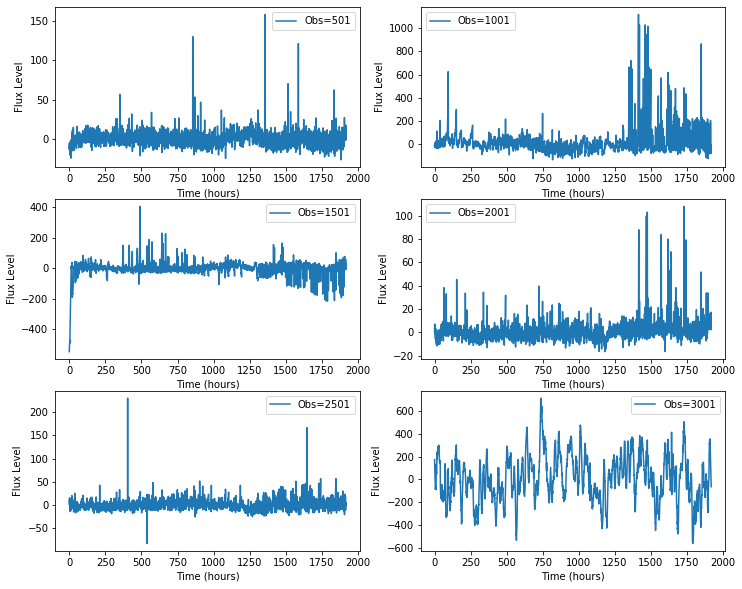

In [6]:
# Display 6 confirmed non-exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*500
    ax.plot(time, flux[step,:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Flux Level')
    ax.set_ylabel('Flux Level')
    ax.legend([('Obs=' + str(step+1))])

### Zoom in the graph
Zoom in to see if there anything we can deduct from the graph

Text(0, 0.5, 'Flux Level')

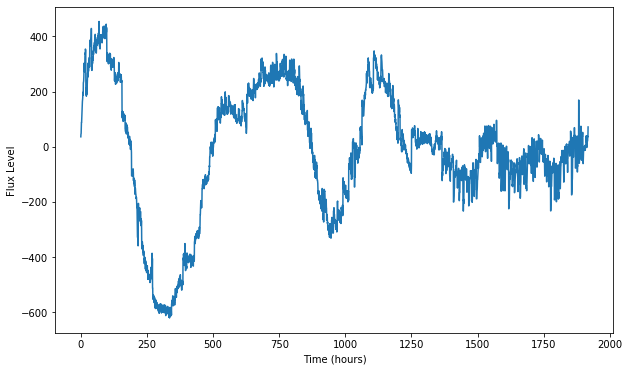

In [7]:
# Plot the graph for the observation 16 that is a confirmed exoplanet
plt.figure(figsize=(10, 6))
plt.plot(time, flux[15,:])
plt.xlabel('Time (hours)')
plt.ylabel('Flux Level')

In [8]:
## Filtering the noise using gaussian filter

Text(0.5, 1.0, 'Flux Level of Observation 11 With Confirmed Exoplanet')

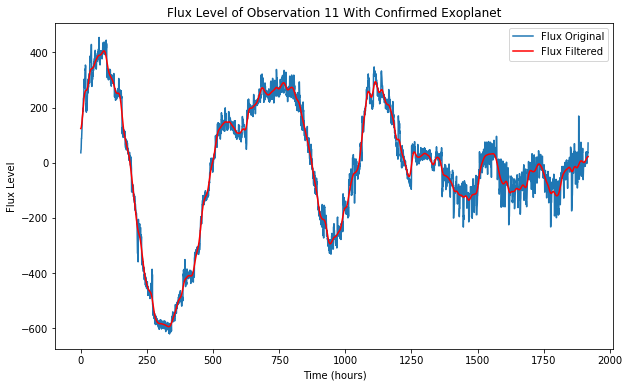

In [9]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter

flux_original = flux[15,:]
flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=10)

plt.figure(figsize=(10,6))
plt.plot(time, flux_original, label='Flux Original')
plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
plt.legend(loc='upper right')
plt.xlabel('Time (hours)')
plt.ylabel('Flux Level')
plt.title('Flux Level of Observation 11 With Confirmed Exoplanet')

In [10]:
def detrender_normalizer(X):
    flux_original = X
    flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=10)
    flux_detrend = flux_original - flux_filtered
    flux_normalized = (flux_detrend-np.mean(flux_detrend)) / (np.max(flux_detrend)-np.min(flux_detrend))
    #flux_normalized = (flux_filtered-np.mean(flux_filtered)) / (np.max(flux_filtered)-np.min(flux_filtered))
    return flux_normalized

In [11]:
df_train = df.copy()
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
flux_norm = df_train.iloc[:,1:].values
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.106403,0.100007,0.058134,0.027612,0.020326,-0.035103,-0.040581,-0.013007,-0.000332,...,-0.046745,-0.064083,-0.065208,0.018642,0.033445,0.062076,0.026078,0.040409,0.002601,-0.027266
1,2,0.041485,0.050703,0.003597,0.037446,-0.037595,-0.026886,-0.054623,-0.054545,-0.054560,...,0.007640,-0.047580,-0.048278,-0.035134,0.002010,0.012103,-0.011757,0.022125,0.039876,0.047170
2,2,0.036390,0.039271,0.018812,0.003153,-0.034190,-0.026011,-0.027999,-0.008730,-0.054926,...,-0.035135,0.042446,0.042538,0.003252,0.011593,0.035374,0.020106,0.004589,-0.032843,-0.057117
3,2,0.019349,0.081422,-0.052651,-0.065242,-0.006866,-0.021728,0.007249,-0.024948,-0.020675,...,0.038329,0.008620,0.007142,0.106338,0.075364,-0.022922,-0.012111,-0.038125,-0.038649,0.054377
4,2,-0.058758,-0.061891,-0.066326,-0.059138,-0.047121,-0.041884,-0.031973,-0.047753,-0.040327,...,-0.038013,0.038773,0.036134,0.052166,0.014349,0.014799,0.029481,0.034669,0.022747,-0.018448


In [12]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Since we are looking at dips in the data, we should remove upper outliers.
    The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                #df.set_value(i,idx,new_val) deprecated use.at[] or .iat[] instead
                df.at[i, idx] = new_val
        
    return df

In [13]:
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.106403,0.100007,0.058134,0.027612,0.020326,-0.035103,-0.040581,-0.013007,-0.000332,...,-0.046745,-0.064083,-0.065208,0.018642,0.033445,0.062076,0.026078,0.040409,0.002601,-0.027266
1,2,0.041485,0.050703,0.003597,0.037446,-0.037595,-0.026886,-0.054623,-0.054545,-0.054560,...,0.007640,-0.047580,-0.048278,-0.035134,0.002010,0.012103,-0.011757,0.022125,0.039876,0.047170
2,2,0.036390,0.039271,0.018812,0.003153,-0.034190,-0.026011,-0.027999,-0.008730,-0.054926,...,-0.035135,0.042446,0.042538,0.003252,0.011593,0.035374,0.020106,0.004589,-0.032843,-0.057117
3,2,0.019349,0.081422,-0.052651,-0.065242,-0.006866,-0.021728,0.007249,-0.024948,-0.020675,...,0.038329,0.008620,0.007142,0.106338,0.075364,-0.022922,-0.012111,-0.038125,-0.038649,0.054377
4,2,-0.058758,-0.061891,-0.066326,-0.059138,-0.047121,-0.041884,-0.031973,-0.047753,-0.040327,...,-0.038013,0.038773,0.036134,0.052166,0.014349,0.014799,0.029481,0.034669,0.022747,-0.018448


In [14]:
df_test = pd.read_csv("../exoTest.csv")
df_test_const = df_test.copy()
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [15]:
#df_test.iloc[:, 1:] = df_test.iloc[:, 1:].apply(detrender_normalizer,axis=1)
#df_test.iloc[:, 1:] = reduce_upper_outliers(df_test.iloc[:, 1:])

In [16]:
df_test.shape

(570, 3198)

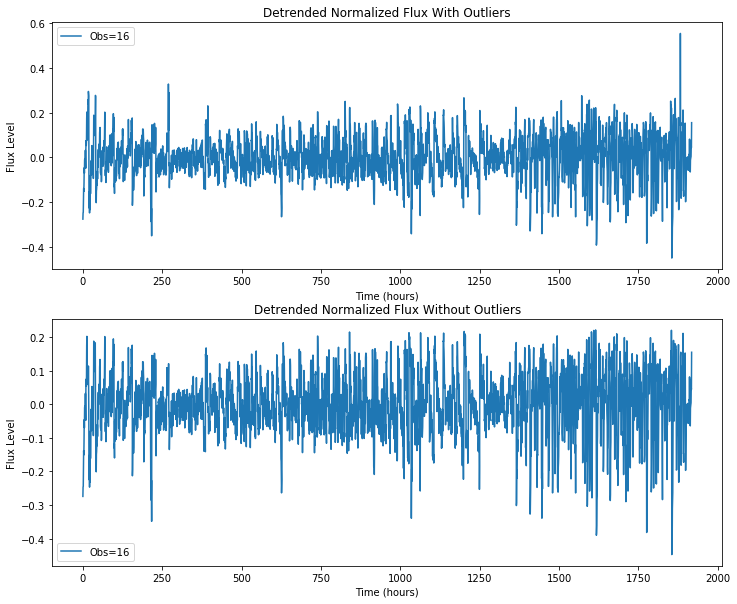

In [17]:
fig1 = plt.figure(figsize=(12, 10))
ax1 = fig1.add_subplot(211)
ax1.plot(time, flux_norm[15,:])
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Flux Level')
ax1.set_title('Detrended Normalized Flux With Outliers')
ax1.legend([('Obs=16')])
           
ax2 = fig1.add_subplot(212)
ax2.plot(time, df_train.iloc[15, 1:])
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Flux Level')
ax2.set_title('Detrended Normalized Flux Without Outliers')
ax2.legend([('Obs=16')])

plt.show()

In [18]:
# Load training and test data into predictor and target variables
X_train = df_train.iloc[:, 1:]
X_test = df_test.iloc[:, 1:]

y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [19]:
df.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

If you see there are only 37 confirmed Exoplanets available in the dataset. It is hard to produce a good prediction with limited confirmed Exoplanets. Due to this imbalanced data, we can create synthetic data based on actual dataset by using SMOTE technique

In [20]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
df_const.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [21]:
X_smt = df_const.iloc[:,1:]
y_smt = df_const.iloc[:, 0]
X_smt, y_smt = smt.fit_sample(X_smt, y_smt)
print(X_smt.shape)
print(y_smt.shape)

(10100, 3197)
(10100,)


In [22]:
features = list(df_const.iloc[:,1:].columns.values)
df_train = pd.DataFrame(data = X_smt, columns = features)
label_train = pd.DataFrame(data = y_smt, columns = ['LABEL'])
df_train = pd.concat([label_train, df_train], axis = 1)
print(df_train.shape)
df_train.head()

(10100, 3198)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [23]:
df_train.LABEL.value_counts()

2    5050
1    5050
Name: LABEL, dtype: int64

We now have both Exoplanets and non-Exoplanets equal in number. The process of detrending and normalizing data is repeated one more time.

In [24]:
#df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
#df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
#df_train.head(-1)

In [25]:
#X_train = df_train.iloc[:, 1:]
#y_train = df_train.iloc[:, 0]

The models have yet be able to predict correctly eventhough numbers of confirmed Exoplanets have been added.

## Analyzing through frequency spectrum
Instead of solving the problem through raw flux data, we can solve by transforming the data to frequency. Since the flux is a signal, we can use Fast Fourier Transform method to convert the signal to frequency.

In [26]:
# Import appropriate package
import scipy

def spectrum_getter(X) :
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [27]:
# Load flux of training and test data into predictor and target variables
X_train_sp = df_train.iloc[:, 1:]
X_test_sp = df_test.iloc[:, 1:]

y_train = df_train.iloc[:, 0]

In [28]:
X_train_sp = X_train_sp.apply(spectrum_getter, axis=1)
X_test_sp = X_test_sp.apply(spectrum_getter, axis=1)
X_train_list = np.array(X_train_sp.values.tolist())
X_test_list = np.array(X_test_sp.values.tolist())

print(X_train_list.shape)
print(X_test_list.shape)

(10100, 3197)
(570, 3197)


In [29]:
label_train = pd.DataFrame(data = y_train, columns = ['LABEL'])
label_test = pd.DataFrame(data = y_test, columns = ['LABEL'])

In [30]:
flux_features = []
for k in range(1, 3198):
    s = 'FLUX.' + str(k)
    flux_features.append(s)

In [31]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train_list)
#X_train_norm = scaler.transform(X_train_list)
#X_test_norm = scaler.transform(X_test_list)

In [32]:
df_temp_train = pd.DataFrame(data = X_train_list, columns = flux_features)
df_train = pd.concat([label_train, df_temp_train], axis = 1)

df_temp_test = pd.DataFrame(data = X_test_list, columns = flux_features)
df_test = pd.concat([label_test, df_temp_test], axis = 1)

print(df_train.shape)
print(df_test.shape)

(10100, 3198)
(570, 3198)


In [33]:
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_test.iloc[:, 1:] = df_test.iloc[:, 1:].apply(detrender_normalizer,axis=1)

df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_test.iloc[:, 1:] = reduce_upper_outliers(df_test.iloc[:, 1:])

In [34]:
X_train_val = df_train.iloc[:, 1:].values
X_test_val = df_test.iloc[:, 1:].values

In [35]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train_std = scaler.fit_transform(X_train_val)
#X_test_std = scaler.transform(X_test_val)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train_std = scaler.fit_transform(X_train_val)
X_test_std = scaler.transform(X_test_val)

In [36]:
df_temp_train = pd.DataFrame(data = X_train_std, columns = flux_features)
df_train = pd.concat([label_train, df_temp_train], axis = 1)

df_temp_test = pd.DataFrame(data = X_test_std, columns = flux_features)
df_test = pd.concat([label_test, df_temp_test], axis = 1)

print(df_train.shape)
print(df_test.shape)
df_train.head()

(10100, 3198)
(570, 3198)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.547646,0.520350,0.539151,0.540872,0.532772,0.505229,0.550841,0.550084,0.555105,...,0.432963,0.567709,0.542950,0.554861,0.532321,0.512167,0.552662,0.562391,0.516405,0.506634
1,2,0.901192,0.819233,0.899431,0.714834,0.562776,0.810596,0.759327,0.451945,0.439143,...,0.442515,0.499816,0.449663,0.477921,0.768877,0.854143,0.587947,0.707397,0.666621,0.828325
2,2,0.370851,0.618479,0.412351,0.613584,0.590892,0.537908,0.558867,0.622289,0.383417,...,0.479660,0.652906,0.359119,0.617143,0.529375,0.515198,0.572432,0.623656,0.349759,0.623439
3,2,0.423718,0.522267,0.537117,0.587629,0.534136,0.565684,0.583932,0.603686,0.580553,...,0.479290,0.512295,0.560042,0.624068,0.578055,0.594757,0.582343,0.637672,0.469312,0.499896
4,2,0.254378,0.716586,0.513075,0.690251,0.714076,0.563283,0.627709,0.472547,0.476380,...,0.252545,0.429945,0.443984,0.456641,0.600608,0.561835,0.728748,0.711766,0.439835,0.778919


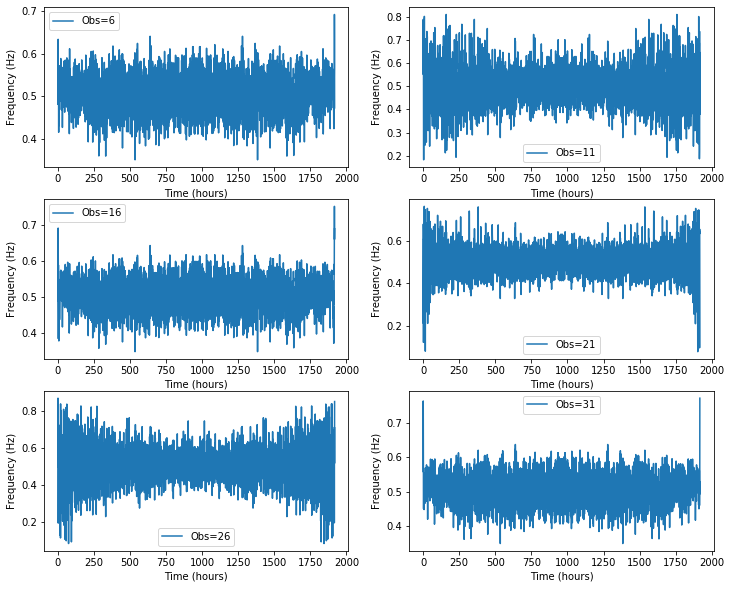

In [37]:
# Display 6 confirmed exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*5
    ax.plot(time, df_train.iloc[step, 1:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Frequency (Hz)')
    ax.legend([('Obs=' + str(step+1))])

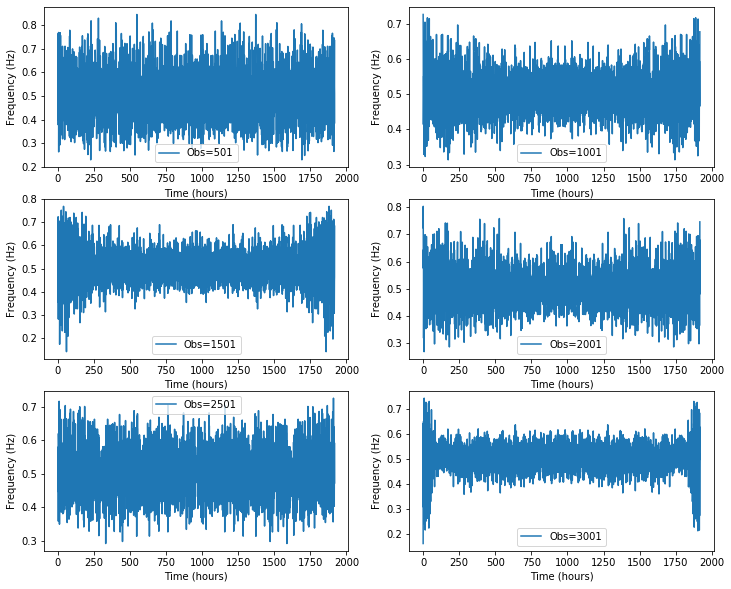

In [38]:
# Display 6 confirmed non-exoplanets flux vs time graphs
fig = plt.figure(figsize=(12, 10))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    step = (i+1)*500
    ax.plot(time, df_train.iloc[step, 1:])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Frequency (Hz)')
    ax.legend([('Obs=' + str(step+1))])

Because the data are symmetrical due to the Fourier transform, we can just use one half of the
graph to reduce training time.

In [39]:
df_train = df_train.iloc[:, :1599]
df_test = df_test.iloc[:, :1599]

X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

features = df_train.iloc[:, 1:].columns.values
time = np.arange(len(features)) * (36.0/60.0)

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10100, 1598)
(570, 1598)
(10100,)
(570,)


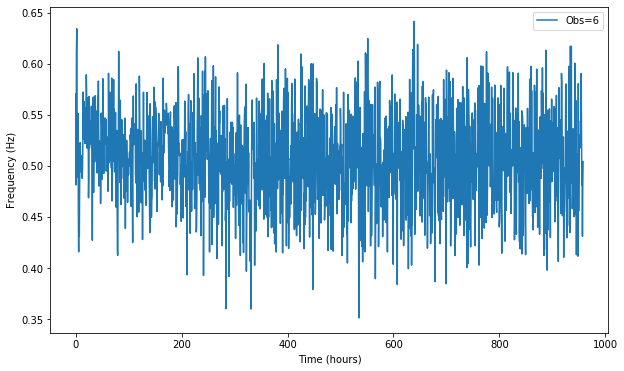

In [40]:
plt.figure(figsize=(10,6))
plt.plot(time, X_train[5, :])
plt.xlabel('Time (hours)')
plt.ylabel('Frequency (Hz)')
plt.legend([('Obs=6')])

In [41]:
X_train = df_train.iloc[:, 100:].values
X_test = df_test.iloc[:, 100:].values

features = df_train.iloc[:, 1:].columns.values
time = np.arange(len(features)) * (36.0/60.0)

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10100, 1499)
(570, 1499)
(10100,)
(570,)


In [42]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, \
    recall_score, accuracy_score, f1_score

logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=400)
logisticRegr.fit(X_train, y_train)

predicted = logisticRegr.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, predicted, pos_label= 2))

confusion_mat

F1 score: 0.2285714285714286
Recall: 0.8
Precision: 0.13333333333333333
Wall time: 8.81 s


C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Predicted,1,2
Actual,,
1,539,26
2,1,4


In [43]:
%%time
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state=0, gamma=.01, C=2)
svclassifier.fit(X_train, y_train)
svm_predicted = svclassifier.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(svm_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, svm_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, svm_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, svm_predicted, pos_label= 2))

confusion_mat

F1 score: 0.19999999999999998
Recall: 0.8
Precision: 0.11428571428571428
Wall time: 42 s


Predicted,1,2
Actual,,
1,534,31
2,1,4


In [44]:
%%time
import xgboost
xgb = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.01)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(xgb_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, xgb_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, xgb_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, xgb_predicted, pos_label= 2))

confusion_mat

F1 score: 0.37499999999999994
Recall: 0.6
Precision: 0.2727272727272727
Wall time: 8min 32s


Predicted,1,2
Actual,,
1,557,8
2,2,3


In [45]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_predicted = dtc.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(dtc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, dtc_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, dtc_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, dtc_predicted, pos_label= 2))

confusion_mat

F1 score: 0.0
Recall: 0.0
Precision: 0.0
Wall time: 30.4 s


Predicted,1,2
Actual,,
1,541,24
2,5,0


In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(rfc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, rfc_predicted,pos_label= 2))
print ('Recall:', recall_score(y_test, rfc_predicted,pos_label= 2))
print ('Precision:', precision_score(y_test, rfc_predicted, pos_label= 2))

confusion_mat

F1 score: 0.33333333333333337
Recall: 0.2
Precision: 1.0
Wall time: 1min 51s


Predicted,1,2
Actual,,
1,565,0
2,4,1


In [47]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(gnb_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, gnb_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, gnb_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, gnb_pred, pos_label= 2))

confusion_mat

F1 score: 0.03791469194312796
Recall: 0.8
Precision: 0.019417475728155338
Wall time: 682 ms


Predicted,1,2
Actual,,
1,363,202
2,1,4


In [48]:
%%time
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(mnb_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, mnb_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, mnb_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, mnb_pred, pos_label= 2))

confusion_mat

F1 score: 0.2727272727272727
Recall: 0.6
Precision: 0.17647058823529413
Wall time: 116 ms


Predicted,1,2
Actual,,
1,551,14
2,2,3


In [49]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
knn_pred = neigh.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(knn_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, knn_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, knn_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, knn_pred, pos_label= 2))

confusion_mat

F1 score: 0.13888888888888887
Recall: 1.0
Precision: 0.07462686567164178
Wall time: 20.8 s


Predicted,1,2
Actual,,
1,503,62
2,0,5


In [50]:
%%time
from sklearn.ensemble import VotingClassifier

lgr = LogisticRegression(solver = 'lbfgs', max_iter=400)
svc = SVC(kernel='linear', random_state=1, gamma=.01, C=1)
neigh = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=300)
dtc = DecisionTreeClassifier()


clf = VotingClassifier(estimators=[
        ('lr', logisticRegr), ('svc', svclassifier), ('knn', neigh),
        ('rfc', rfc), ('dtc', dtc), ('mnb', mnb), ('nb', gnb)], voting='hard')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(clf_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, clf_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, clf_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, clf_pred, pos_label= 2))

confusion_mat

C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


F1 score: 0.5333333333333333
Recall: 0.8
Precision: 0.4
Wall time: 3min 32s


Predicted,1,2
Actual,,
1,559,6
2,1,4


In [51]:
%%time
from sklearn.ensemble import BaggingClassifier
lgr = LogisticRegression(solver = 'lbfgs', max_iter=400)
num_trees = 30
seed = 7
bgc = BaggingClassifier(base_estimator = lgr, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
bgc_pred = bgc.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(bgc_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, bgc_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, bgc_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, bgc_pred, pos_label= 2))

confusion_mat

C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

F1 score: 0.20512820512820512
Recall: 0.8
Precision: 0.11764705882352941
Wall time: 4min 49s


Predicted,1,2
Actual,,
1,535,30
2,1,4


In [52]:
%%time
from sklearn.ensemble import BaggingClassifier
cart = DecisionTreeClassifier()
num_trees = 30
seed = 8
bgc = BaggingClassifier(base_estimator = cart, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
y_pred_bgc = bgc.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_bgc, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Wall time: 8min 13s


Predicted,1,2
Actual,,
1,562,3
2,4,1


In [5]:
%%time
dont run or you will die
estim = 100
max_feautures = 'auto'
num_trees = 100
seed = 8
rfc = RandomForestClassifier(n_estimators=estim, 
                             bootstrap=True, 
                          max_features='auto')
bgc = BaggingClassifier(base_estimator = rfc, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
y_pred_bgc = bgc.predict(X_test)
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(y_pred_bgc, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

SyntaxError: invalid syntax (<unknown>, line 1)

In [53]:
%%time
from sklearn.ensemble import AdaBoostClassifier
lgr = LogisticRegression(solver = 'lbfgs', max_iter=200)
ada = AdaBoostClassifier(base_estimator=lgr, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.25806451612903225
Recall: 0.8
Precision: 0.15384615384615385
Wall time: 1min 3s


Predicted,1,2
Actual,,
1,543,22
2,1,4


In [53]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier()
ada = AdaBoostClassifier(base_estimator=xgb, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

MemoryError: 

In [54]:
%%time
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge')
ada = AdaBoostClassifier(base_estimator=sgd, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.27777777777777773
Recall: 1.0
Precision: 0.16129032258064516
Wall time: 3.49 s


Predicted,1,2
Actual,,
1,539,26
2,0,5


In [55]:
%%time
gnb = GaussianNB()
ada = AdaBoostClassifier(base_estimator=gnb, algorithm='SAMME', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.08333333333333336
Recall: 0.8
Precision: 0.04395604395604396
Wall time: 25.4 s


Predicted,1,2
Actual,,
1,478,87
2,1,4


In [56]:
%%time
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME.R', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.08333333333333333
Recall: 0.2
Precision: 0.05263157894736842
Wall time: 31 s


Predicted,1,2
Actual,,
1,547,18
2,4,1


In [57]:
%%time
mnb = MultinomialNB()
ada = AdaBoostClassifier(base_estimator=mnb, algorithm='SAMME.R', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.30303030303030304
Recall: 1.0
Precision: 0.17857142857142858
Wall time: 11.2 s


Predicted,1,2
Actual,,
1,542,23
2,0,5


In [58]:
%%time
rfc = RandomForestClassifier(n_estimators=300)
ada = AdaBoostClassifier(base_estimator=rfc, algorithm='SAMME.R', n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(y_pred_ada, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, y_pred_ada,pos_label= 2))
print ('Recall:', recall_score(y_test, y_pred_ada,pos_label= 2))
print ('Precision:', precision_score(y_test, y_pred_ada, pos_label= 2))

confusion_mat

F1 score: 0.33333333333333337
Recall: 0.2
Precision: 1.0
Wall time: 1min 53s


Predicted,1,2
Actual,,
1,565,0
2,4,1


In [59]:
%%time
neigh = KNeighborsClassifier()
num_trees = 30
seed = 7
bgc = BaggingClassifier(base_estimator = neigh, 
                          n_estimators = num_trees, 
                          random_state = seed)
bgc.fit(X_train, y_train)
bgc_pred = bgc.predict(X_test)
target_actual = pd.Series(y_test, name='Actual')
target_predicted = pd.Series(bgc_pred, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

print ('F1 score:', f1_score(y_test, bgc_pred,pos_label= 2))
print ('Recall:', recall_score(y_test, bgc_pred,pos_label= 2))
print ('Precision:', precision_score(y_test, bgc_pred, pos_label= 2))

confusion_mat

F1 score: 0.13513513513513511
Recall: 1.0
Precision: 0.07246376811594203
Wall time: 12min 13s


Predicted,1,2
Actual,,
1,501,64
2,0,5
